In [1]:
import pandas as pd


In [2]:
data = pd.read_excel('data.xlsx',header=None)

label = pd.read_excel('label.xlsx',header=None)

In [3]:
from sklearn.model_selection import train_test_split

x_train,x_test, y_train , y_test = train_test_split(data,label, test_size=0.2, random_state=1,shuffle=True) 

In [4]:
from sklearn.svm import SVC

from sklearn.model_selection import RandomizedSearchCV
import numpy as np


svc = SVC()

SVC_param = {

                    'C': [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100, 1000],
                    'kernel': ['rbf','linear']
            }


SVC_cv = RandomizedSearchCV(svc, param_distributions=SVC_param, cv=5,n_jobs=-1, n_iter=200, random_state=0)
# # ------------------------模型    参数优化                  交叉验证   迭代次数   随机度
SVC_cv.fit(x_train, y_train)

SVC_cv.best_params_

d:\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 16 is smaller than n_iter=200. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


KeyboardInterrupt: 

In [5]:
from sklearn.model_selection import GridSearchCV

SVC_param =  {
                    'C': [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100, 1000],
                    'kernel': ['rbf','linear']
            }
            
SVC_cv = GridSearchCV(svc, param_grid=SVC_param, cv=5,n_jobs=-1)
SVC_cv.fit(x_train, y_train)

SVC_cv.best_params_

d:\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'C': 1, 'kernel': 'linear'}

In [9]:
from sklearn.model_selection import cross_validate

SVC_best = SVC(kernel= 'linear',C=1)
SVC_best.fit(x_train, y_train)
SVC_best.score(x_test,y_test)



d:\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1.0

In [43]:
from sklearn.metrics import confusion_matrix as CM

# 查看预测结果的概率\
y_pred = SVC_best.predict(x_test)
# proba = SVC_best.predict_proba(x_test)
# print(proba.shape) # 返回的是每个样本，对应每个分类的概率

# print(proba.sum(1)) # 每一行的概率之和都是1

# 查看混淆矩阵
print(CM(y_test, y_pred))

[[17  0]
 [ 0 23]]


In [44]:
from sklearn import metrics  # 模型评价

# y_prob = SVC_best.predict_proba(x_test)[:,1]
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
print(confusion_matrix)

auc_roc=metrics.classification_report(y_test,y_pred)
print(auc_roc)


##真假阳性
# 导入评价模块
from sklearn.metrics import roc_curve, auc

# 评价指标
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
# roc曲线面积
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)

[[17  0]
 [ 0 23]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        23

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

0.9948849104859335


In [23]:
from sklearn.naive_bayes import GaussianNB

GNB = GaussianNB()

## 建模
GNB.fit(x_train, y_train)
GNB.score(x_test,y_test)

d:\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.925

In [40]:
from sklearn.metrics import confusion_matrix as CM

# 查看预测结果的概率\
y_pred = GNB.predict(x_test)
proba = GNB.predict_proba(x_test)
print(proba.shape) # 返回的是每个样本，对应每个分类的概率

print(proba.sum(1)) # 每一行的概率之和都是1

# 查看混淆矩阵
print(CM(y_test, y_pred))

(40, 2)
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[[17  0]
 [ 3 20]]


In [51]:
from sklearn import metrics  # 模型评价

y_prob = GNB.predict_proba(x_test)[:,1]
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
print(confusion_matrix)

auc_roc=metrics.classification_report(y_test,y_pred)
print(auc_roc)

##真假阳性
# 导入评价模块
from sklearn.metrics import roc_curve, auc

# 评价指标
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
# roc曲线面积
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)

[[17  0]
 [ 0 23]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        23

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

0.9948849104859335


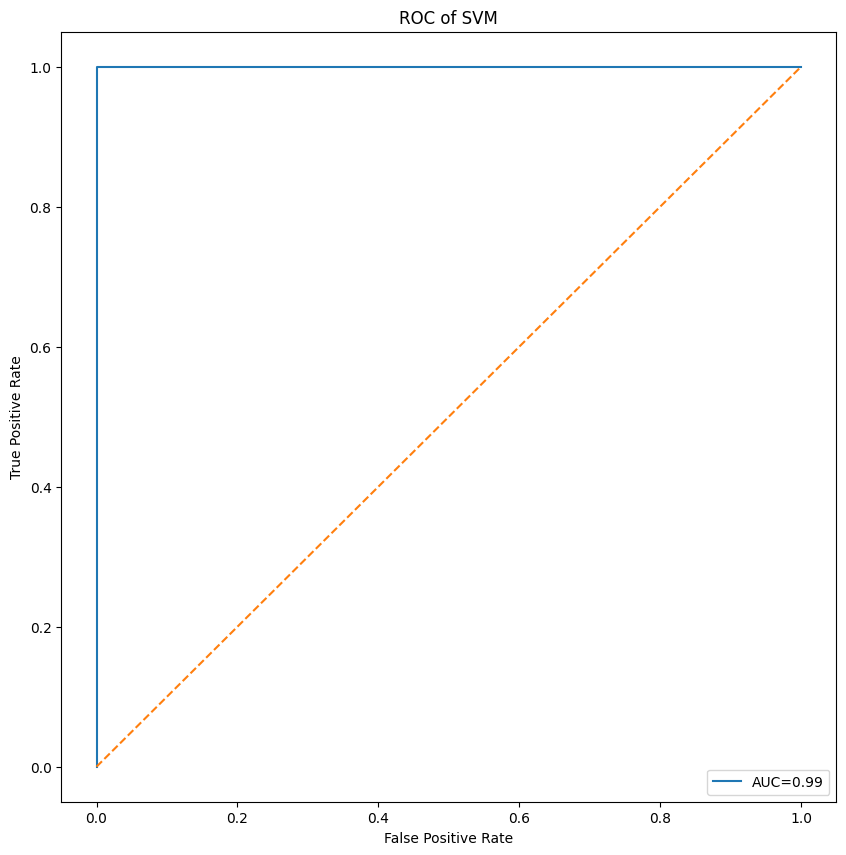

In [54]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title("ROC of SVM")
plt.plot(false_positive_rate,true_positive_rate,label="AUC=%0.2f"%roc_auc)
plt.legend(loc="lower right")
plt.plot([0,1],[0,1],linestyle='--')
plt.axis("tight")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()


In [52]:
false_positive_rate = np.array([0,0,0,0,0,1])
true_positive_rate = np.array([0,1,1,1,1,1])

d:\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.925